In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing dataset[Alphabets_data]
df=pd.read_csv("/content/sonar_dataset.csv",header=None)#donot taking column headings
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.shape

(208, 61)

In [ ]:
df.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
56,float64
57,float64
58,float64
59,float64


In [ ]:
df[60].value_counts()

,count
60,
M,111
R,97


In [ ]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [ ]:
x=df.drop(60,axis=1)

In [ ]:
y=df[60]

In [ ]:
x.shape

(208, 60)

In [ ]:
y.shape

(208,)

In [ ]:
y.nunique()

2

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
y[0:5]

array([1, 1, 1, 1, 1])

#building dnn model

In [ ]:
import tensorflow as tf
from tensorflow import keras

force to overfit the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(208, input_shape=(60,), activation="relu"),
   # keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation="relu"),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(50, activation="relu"),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4379 - loss: 0.6969
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5140 - loss: 0.6922  
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5554 - loss: 0.6897  
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6816 - loss: 0.6775  
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6840 - loss: 0.6666 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8151 - loss: 0.6482 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7351 - loss: 0.6321  
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7975 - loss: 0.6077  
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7424 - loss: 0.5834  
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6876 - loss: 0.5824 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8466 - loss: 0.5016  
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7710 - loss: 0.4

In [ ]:
y_pred=model.predict(X_test)
y_pred[0:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[7.5297122e-04],
       [9.9908042e-01],
       [5.5319077e-01],
       [9.9613833e-01],
       [5.4243822e-03]], dtype=float32)

In [ ]:
#applying threshold
y_pred=[1 if i>0.5 else 0 for i in y_pred]
y_pred[0:5]

[0, 1, 1, 1, 0]

In [ ]:
y_test[0:5]

array([0, 1, 1, 1, 0])

####successfully overfitted our model

drop out

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(208, input_shape=(60,), activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=50,batch_size=8)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5156 - loss: 0.6995
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5307 - loss: 0.6950
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4454 - loss: 0.6991
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5901 - loss: 0.6774
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5746 - loss: 0.6984
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5729 - loss: 0.6875
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5946 - loss: 0.6793
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5701 - loss: 0.6720
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6388 - loss: 0.6385
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5625 - loss: 0.6950
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5772 - loss: 0.6384
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6307 - lo

here we got 89% accuracy

In [ ]:
#train data evaluate
model.evaluate(X_train,y_train)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9143 - loss: 0.1848  


[0.16873928904533386, 0.9457831382751465]

In [ ]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8368 - loss: 0.3557 


[0.3908548951148987, 0.8333333134651184]

In [ ]:
y_pred=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [ ]:
y_pred[0:5]

array([[7.6865859e-04],
       [9.9519777e-01],
       [7.1099913e-01],
       [9.9525315e-01],
       [6.5274267e-03]], dtype=float32)

In [ ]:
#applying threshold
y_pred=[1 if i>0.5 else 0 for i in y_pred]
y_pred[0:10]

[0, 1, 1, 1, 0, 1, 0, 0, 1, 0]

In [ ]:
y_test[0:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[24,  2],
       [ 2, 14]])

<Axes: >

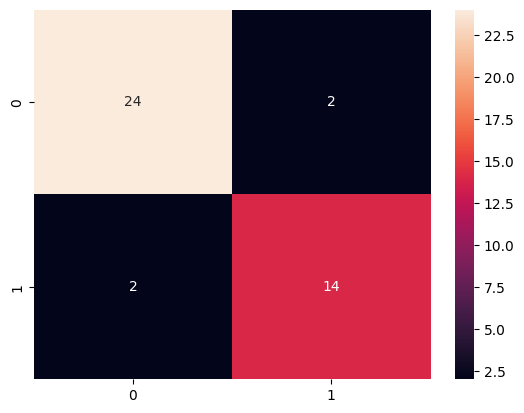

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
#classification_report
cr=classification_report(y_test,y_pred)
print(f"{cr}\n")

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.88      0.88      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42
:



In [ ]:
weight=model.get_weights()

In [ ]:
coef=weight[0]
coef

array([[-0.05009404, -0.15265496, -0.10520356, ...,  0.00929975,
        -0.03132397, -0.0693856 ],
       [-0.01756694, -0.12472446,  0.0931805 , ...,  0.02839581,
        -0.0271081 ,  0.10928974],
       [-0.08237778, -0.04743092,  0.10169169, ..., -0.02781253,
        -0.08007123,  0.09718857],
       ...,
       [ 0.08505478,  0.07599074, -0.13805152, ...,  0.08659279,
        -0.01538549, -0.06546964],
       [-0.06043311, -0.0249582 , -0.14251208, ..., -0.06168925,
        -0.00312317,  0.04145716],
       [ 0.07144997,  0.06053696, -0.09372803, ...,  0.00601918,
         0.07389625, -0.03959414]], dtype=float32)

In [ ]:
weights=weight[1]
weights

array([-2.70315092e-02,  2.39986014e-02,  2.75855269e-02,  3.79240443e-03,
        4.66792174e-02,  1.01699205e-02, -2.74899341e-02,  1.88129451e-02,
        7.43793789e-03,  0.00000000e+00, -1.55786239e-02,  9.48819611e-03,
        3.29882763e-02, -1.43183991e-02, -5.32376720e-03,  4.28580232e-02,
       -9.35764797e-03,  1.75393112e-02,  5.00128930e-03,  2.09153369e-02,
        4.08338159e-02, -4.54708096e-03,  2.85575856e-02, -2.44901348e-02,
        0.00000000e+00,  4.87067550e-03, -9.38820280e-03, -2.30100900e-02,
        0.00000000e+00,  1.28104081e-02,  2.51511298e-02,  2.85706762e-02,
       -2.51941737e-02,  3.75353731e-02, -1.58924926e-02, -1.25412410e-02,
        9.50564537e-03,  1.63587052e-02, -8.15174356e-03,  2.25267094e-02,
        6.52959384e-03,  2.52354015e-02,  0.00000000e+00,  2.68932022e-02,
       -1.28202103e-02, -5.17457118e-03, -2.74130460e-02,  1.37738548e-02,
       -3.33024422e-03,  1.39697976e-02, -1.17589952e-02,  4.06853855e-02,
        0.00000000e+00, -